## Objetivo del módulo

Conocer el uso de la estructura de árboles binarios para la ordenación de datos

## Preguntas

- ¿Cómo se puede mantener ordenado un árbol binario?
- ¿Qué ventajas tendría mantenerlo ordenado?
- ¿Qué resultados dan los distintos tipos de recorridos sobre el árbol?
- ¿Cómo podemos mantener un árbol binario balanceado?

### Observa la siguiente implementación

- usamos explícitamente estructuras para almacenar un hijoz izquierdo y uno derecho
- tenemos un algoritmo para insertar elementos garantizando un cierto orden
- los recorridos sobre dicho orden nos producen listas ordenadas
- la complejidad computacional de cada operación

In [1]:
import numpy as np

class BTNode:
    
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left  = None
        self.right = None
        if left is not None:
            self.add_left(left)
        if right is not None:
            self.add_right(right)
    
    def add_left(self, value):
        assert self.left is None, "node already has left child"
        self.left  = self.__class__(value) if not isinstance(value,self.__class__) else value
        return self
        
    def add_right(self, value):
        assert self.right is None, "node already has right child"
        self.right  = self.__class__(value) if not isinstance(value,self.__class__) else value
        return self
    
    def swap_children(self):
        tmp = self.left
        self.left = self.right
        self.right = self.left
        return self
    
    def insert_ordered(self, new_value):
        if new_value < self.value:
            if self.left is None:
                self.add_left(new_value)
            else:
                self.left.insert_ordered(new_value)
        else:
            if self.right is None:
                self.add_right(new_value)
            else:
                self.right.insert_ordered(new_value)
        return self
    
    def ird(self):
        if self.value==None:
            return []
        s1 = self.left.ird() if self.left is not None else []
        s2 = self.right.ird() if self.right is not None else []
        return s1+[self.value]+s2    
    
    def to_indented_string(self, level, prefix=""):
        s = (" "*2*level + prefix + str(self.value) + "\n") if self.value is not None else ""
        s += self.left.to_indented_string(level+1, prefix="L: ") if self.left is not None else ""
        s += self.right.to_indented_string(level+1, prefix="R: ") if self.right is not None else ""
        return s       

    def __repr__(self):
        return self.to_indented_string(0)
 
    @classmethod
    def from_list(cls, a_list):
        r = cls(a_list[0])
        for i in a_list[1:]:
            r.insert_ordered(i)
        return r
    
    @classmethod
    def sort_list(cls, a_list):
        r = cls.from_list(a_list)
        return np.r_[r.ird()]

### podemos crear un árbol con un orden arbitrario

In [2]:
k=BTNode(10)\
    .add_right(BTNode(20)\
           .add_left(BTNode(15)\
                .add_left(91))\
           .add_right(21))\
    .add_left(12)
k

10
  L: 12
  R: 20
    L: 15
      L: 91
    R: 21

In [3]:
k.ird()

[12, 10, 91, 15, 20, 21]

### podemos crear un árbol manteniendo la siguiente propiedad:

- para cualquier nodo, su hijo izquierdo es menor y su hizo derecho es mayor

In [4]:
k = BTNode(10).insert_ordered(2).insert_ordered(12).insert_ordered(1).insert_ordered(4)
k

10
  L: 2
    L: 1
    R: 4
  R: 12

In [5]:
k = BTNode.from_list([10,2,12,1,4])
k

10
  L: 2
    L: 1
    R: 4
  R: 12

de modo que al recorrerlo nos produce una lista ordenada

In [6]:
k.ird()

[1, 2, 4, 10, 12]

In [7]:
BTNode.sort_list([10,43,12,1,-20])

array([-20,   1,  10,  12,  43])

In [8]:
np.random.permutation(100)[:10]

array([54,  5, 57, 13, 34, 65, 49, 83, 21, 20])

In [9]:
for _ in range(10):
    l = np.random.permutation(100)[:10]
    print(l,"-->", end=' ')
    print(BTNode.sort_list(l))

[48 87 62  9 18 43 75 66 61 28] --> [ 9 18 28 43 48 61 62 66 75 87]
[ 0 99 96 93 42 57 71 44 94 18] --> [ 0 18 42 44 57 71 93 94 96 99]
[70 94 88 65 23 37 99 86 14 19] --> [14 19 23 37 65 70 86 88 94 99]
[12 59 62 17 38 69 31 27  7 40] --> [ 7 12 17 27 31 38 40 59 62 69]
[49 94 21 30 84 23 35 10 34 63] --> [10 21 23 30 34 35 49 63 84 94]
[64  2 45 54  8 43 60 99 21 84] --> [ 2  8 21 43 45 54 60 64 84 99]
[ 1 45 95 54 47 70 24 20 56 31] --> [ 1 20 24 31 45 47 54 56 70 95]
[72 31 48 10 54 91 30  3 51 23] --> [ 3 10 23 30 31 48 51 54 72 91]
[19 28 39 50 23 89 16 21 51  7] --> [ 7 16 19 21 23 28 39 50 51 89]
[84 63 15 65 48 32  3 21 91 29] --> [ 3 15 21 29 32 48 63 65 84 91]


observa que, en la lección anterior, **ordenábamos in situ** y ahora creamos una estructura nueva.

finalmente, medimos rendimiento

In [12]:
def experiment_insert_ordered(n):
    k = np.random.permutation(100*n)[:n]
    tree = BTNode(k[0])
    for i in k:
        tree.insert_ordered(i)
    return tree

def experiment_sort(n):
    k = np.random.permutation(100*n)[:n]
    BTNode.sort_list(k)

r_times_insert = []
r_times_ird = []
r_times_sort = []
n_list = np.arange(10,100,10)*100

print("running experiments")
for n in n_list:
    print (".", end=" ")
    t = %timeit -r 3 -n 3 -o -q experiment_insert_ordered(n)
    r_times_insert.append(t.best)

    k = experiment_insert_ordered(n)
    t = %timeit -r 3 -n 3 -o -q k.ird()
    r_times_ird.append(t.best)

    t = %timeit -r 3 -n 3 -o -q experiment_sort(n)
    r_times_sort.append(t.best)

running experiments
. . . . . . . . . 

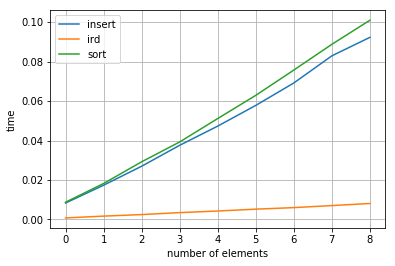

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r_times_insert, label="insert")
plt.plot(r_times_ird, label="ird")
plt.plot(r_times_sort, label="sort")
plt.ylabel("time")
plt.xlabel("number of elements")
plt.grid()
plt.legend()